In [415]:
import numpy as np
import matplotlib.pyplot as plt

In [416]:
import random

## Generates N random points for logistic regression on a line w
def generate_lr(N=20,w0=0,w1=1):
    n = 0
    X1 = []
    Y = []
    while(n < N):
        x1 = random.uniform(-10,10)
        x2 = random.uniform(-1,1)
        y = w0 + w1*x1 + x2
        X1.append(x1)
        Y.append(y)
        n += 1
    data = [np.array([1,X1[i],Y[i]]) for i in range(N)]
    return data

In [417]:
f_w0, f_w1 = 1, 1
N = 50
data = generate_lr(N, f_w0, f_w1)

In [418]:
print(data)

[array([1.        , 7.25160662, 8.50794289]), array([ 1.        , -4.32326194, -2.87089988]), array([ 1.        , -7.75555844, -6.71937112]), array([ 1.        , -1.53913306, -0.09539416]), array([ 1.        , -5.12938755, -4.96936812]), array([1.        , 8.41866738, 8.58703878]), array([ 1.        ,  8.76060548, 10.3045645 ]), array([ 1.        , -1.82601398, -1.15195702]), array([1.        , 0.82253564, 2.67784574]), array([ 1.        , -7.09831239, -5.2380807 ]), array([ 1.        , -6.01958541, -4.90307466]), array([ 1.        , -2.13904475, -0.35694318]), array([ 1.       , -3.8982818, -2.4945577]), array([ 1.        , -2.63662274, -1.88870483]), array([ 1.        , -6.82380707, -6.30695737]), array([1.        , 3.93246004, 5.88252001]), array([ 1.        , -4.70208618, -3.19791142]), array([ 1.        , -4.32639031, -3.04421408]), array([1.        , 2.67621989, 3.65758918]), array([ 1.        , -1.11599416, -0.16869401]), array([ 1.        , -5.40561262, -4.34105826]), array([1.

In [419]:
def abline(slope, intercept, color='b'):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = "x_2="+str(slope)+"x_1+"+str(intercept), c=color )

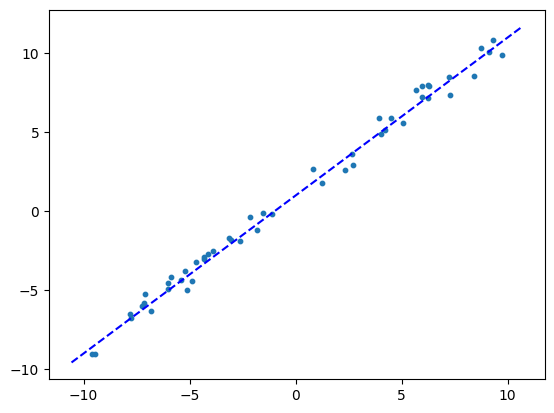

In [420]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
markers = [] #'o' or '+'
colors = [] # 'b' or 'r'
cnt = 0
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
plt.show()

In [421]:
X = [[i[0], i[1]] for i in data]
Y  = [i[2] for i in data]

In [422]:
XtX = np.matmul(np.transpose(X), X)
XtX.shape

(2, 2)

In [423]:
XtX_inv = np.linalg.inv(XtX)
XtX_inv.shape
XtX_inv

array([[0.02002593, 0.0001235 ],
       [0.0001235 , 0.00058811]])

In [424]:
X_pi = np.matmul(XtX_inv, np.transpose(X))
X_pi

array([[ 0.0209215 ,  0.01949202,  0.01906813,  0.01983585,  0.01939246,
         0.02106563,  0.02110785,  0.01980042,  0.02012752,  0.0191493 ,
         0.01928252,  0.01976177,  0.0195445 ,  0.01970032,  0.0191832 ,
         0.02051159,  0.01944523,  0.01949163,  0.02035644,  0.01988811,
         0.01935835,  0.0207296 ,  0.02031361,  0.02052082,  0.01885991,
         0.0207607 ,  0.02064982,  0.0211737 ,  0.01964764,  0.02018128,
         0.02079833,  0.02092757,  0.01942147,  0.0195138 ,  0.01963973,
         0.02079757,  0.01929817,  0.02035985,  0.02054589,  0.02076043,
         0.02115463,  0.02080503,  0.01928502,  0.01914177,  0.02058385,
         0.01906301,  0.01938124,  0.01884047,  0.02122771,  0.01913301],
       [ 0.00438821, -0.00241904, -0.00443759, -0.00078167, -0.00289312,
         0.00507456,  0.00527566, -0.00095039,  0.00060724, -0.00405106,
        -0.00341665, -0.00113449, -0.0021691 , -0.00142711, -0.00388962,
         0.0024362 , -0.00264182, -0.00242088,  0.

In [425]:
w = np.matmul(X_pi, Y)
w

array([1.11907404, 0.99660054])

Plot the final hypothesis with the target and the data points

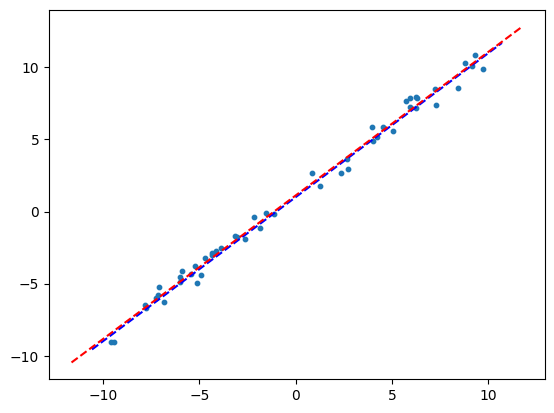

In [426]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
abline(w[1],w[0], color='r')
plt.show()

In [427]:
Y_pred = np.matmul(X, w)
np.sum(np.square(Y_pred-Y))

14.183436181477783

In [428]:
w_other = [3, 2]
Y_other = np.matmul(X, w_other)
np.sum(np.square(Y_other-Y))

1865.6204368746212

What about the test data set?

In [429]:
#50 test samples
testdata = generate_lr(50, f_w0, f_w1)
X_test = [[i[0], i[1]] for i in testdata]
Y_test  = [i[2] for i in testdata]
Y_pred_test = np.matmul(X_test, w)
np.sum(np.square(Y_pred_test-Y_test))

18.656927469819028

In [430]:
Y_pred_test_target = np.matmul(X_test, [1, 1])
np.sum(np.square(Y_pred_test_target-Y_test))

17.237893522108156

In [431]:
mean_square_error_test = np.sum(np.square(Y_pred_test-Y_test))/50

In [432]:
mean_square_error_test

0.3731385493963806

In [433]:
mean_square_error_target = np.sum(np.square(Y_pred_test_target-Y_test))/50

In [434]:
mean_square_error_target

0.3447578704421631

In [435]:
def regularized_linearRegression(X, Y, lamda=0):
    XtX = np.matmul(np.transpose(X), X)

    XtX += lamda * np.identity(XtX.shape[0])

    XtX_inv = np.linalg.inv(XtX)
    X_pi = np.matmul(XtX_inv, np.transpose(X))
    w = np.matmul(X_pi, Y)
    return w

In [436]:
# Define the regularization parameter values
lamdaVal = [0, 0.001, 0.1, 1]

In [437]:
weights = []

In [438]:
lamdaVal.sort()
lamdaVal

[0, 0.001, 0.1, 1]

Plotting the final hypothesis for each value of Lamda


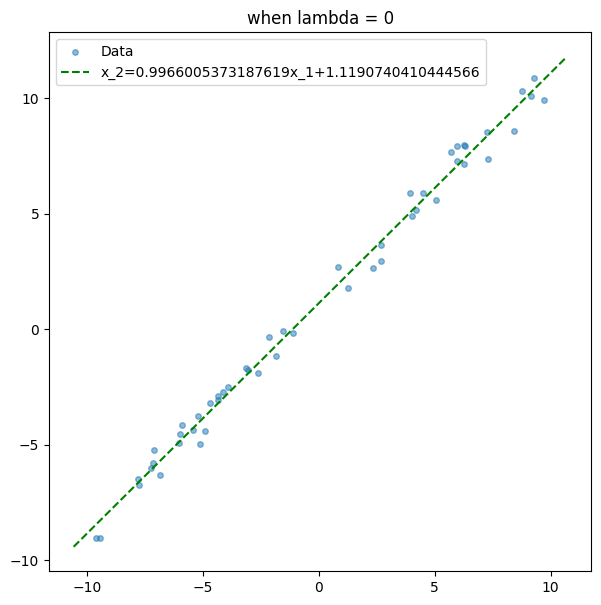

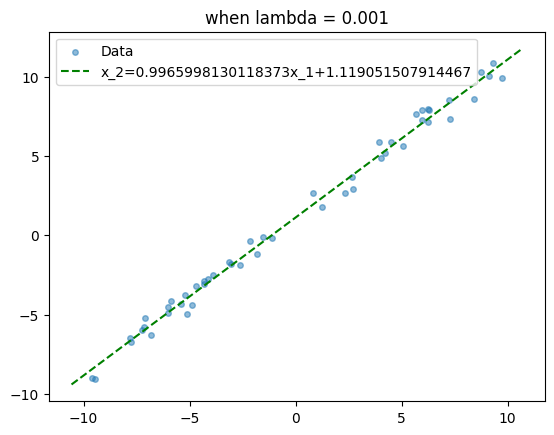

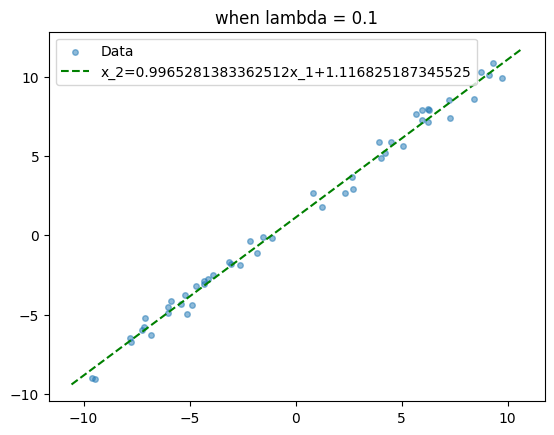

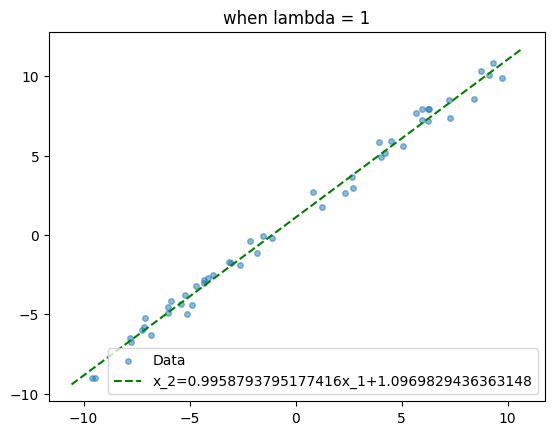

In [439]:
plt.figure(figsize=(7, 7))
for i, l in enumerate(lamdaVal):
    plt.scatter(X1, Y, s=16, label='Data', alpha=0.5)
    w_regularized = regularized_linearRegression(X, Y, l)
    weights.append(w_regularized)

    label = f'lambda = {l}, w0 = {weights[i][0]:.6f}, w1 = {weights[i][1]:.6f}'
    abline(w_regularized[1], w_regularized[0], color=f'green')

    plt.legend()
    plt.title(f'when lambda = {l}')
    plt.show()

Finding Final hypothesis for each value of Lamda


In [440]:
w_regularized_lamda0 = regularized_linearRegression(X, Y, lamda=0)
w_regularized_lamda0

array([1.11907404, 0.99660054])

In [441]:
w_regularized_lamda_001 = regularized_linearRegression(X, Y, lamda=0.001)
w_regularized_lamda_001

array([1.11905151, 0.99659981])

In [442]:
w_regularized_lamda_01 = regularized_linearRegression(X, Y, lamda=0.01)
w_regularized_lamda_01

array([1.11884875, 0.99659329])

In [443]:
w_regularized_lamda_1 = regularized_linearRegression(X, Y, lamda=1)
w_regularized_lamda_1

array([1.09698294, 0.99587938])

In [444]:
X = np.array(X)
X

array([[ 1.        ,  7.25160662],
       [ 1.        , -4.32326194],
       [ 1.        , -7.75555844],
       [ 1.        , -1.53913306],
       [ 1.        , -5.12938755],
       [ 1.        ,  8.41866738],
       [ 1.        ,  8.76060548],
       [ 1.        , -1.82601398],
       [ 1.        ,  0.82253564],
       [ 1.        , -7.09831239],
       [ 1.        , -6.01958541],
       [ 1.        , -2.13904475],
       [ 1.        , -3.8982818 ],
       [ 1.        , -2.63662274],
       [ 1.        , -6.82380707],
       [ 1.        ,  3.93246004],
       [ 1.        , -4.70208618],
       [ 1.        , -4.32639031],
       [ 1.        ,  2.67621989],
       [ 1.        , -1.11599416],
       [ 1.        , -5.40561262],
       [ 1.        ,  5.6977863 ],
       [ 1.        ,  2.32936128],
       [ 1.        ,  4.00720324],
       [ 1.        , -9.44164624],
       [ 1.        ,  5.94962575],
       [ 1.        ,  5.05174447],
       [ 1.        ,  9.29378774],
       [ 1.        ,

In [445]:
Y = np.array(Y)
Y

array([ 8.50794289, -2.87089988, -6.71937112, -0.09539416, -4.96936812,
        8.58703878, 10.3045645 , -1.15195702,  2.67784574, -5.2380807 ,
       -4.90307466, -0.35694318, -2.4945577 , -1.88870483, -6.30695737,
        5.88252001, -3.19791142, -3.04421408,  3.65758918, -0.16869401,
       -4.34105826,  7.66178348,  2.64346873,  4.89760191, -9.03540206,
        7.90538224,  5.60744662, 10.86565541, -1.78635825,  1.78106257,
        7.15756263,  7.36282628, -4.40781604, -2.72904636, -1.68297484,
        7.96458954, -4.14200593,  2.93552902,  5.17382763,  7.2588108 ,
       10.07383068,  7.90539702, -4.52802143, -5.80086969,  5.88916591,
       -6.48022127, -3.76965161, -9.01682712,  9.91038374, -5.99572976])

In [446]:
from sklearn.model_selection import KFold

In [447]:
#5-fold cross validation
ktime_fold = KFold(n_splits=5)

In [448]:
lamdaBest = None
mseBest = float('inf')

In [449]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [450]:
for l in lamdaVal:
    mseTotal = 0

    for train_index, test_index in ktime_fold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

        w_regularized = regularized_linearRegression(X_train, Y_train, l)

        Y_pred = np.dot(X_test, w_regularized)

        mse = mean_squared_error(Y_test, Y_pred)
        mseTotal += mse

    mseAverage = mseTotal / 5
    print(f"lambda : {l} MSE : {mseAverage}")
    if mseAverage < mseBest:
        mseBest = mseAverage
        lamdaBest = l


lambda : 0 MSE : 0.29937120501016545
lambda : 0.001 MSE : 0.299371202441865
lambda : 0.1 MSE : 0.29937930802421453
lambda : 1 MSE : 0.30017611881222556


The Best performing Model when we do 5-fold cross validation on each lamda with its Mean Squared Error is:



In [451]:
print(f"Best lambda: {lamdaBest} with MSE: {mseBest}")

Best lambda: 0.001 with MSE: 0.299371202441865
